In [55]:
from sklearn import mixture
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from mpl_toolkits.mplot3d import Axes3D
import sklearn.cluster

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

fig = plt.figure(figsize=(10,10),  dpi = 1000)

def fit_samples_gmm(samples, n_components):
    gmix = mixture.GMM(n_components=n_components, covariance_type='full')
    gmix.fit(samples)
    print gmix.means_
    print gmix.predict(samples)
    colors = ['r' if i==0 else 'g' for i in gmix.predict(samples)]
    ax = plt.gca()
    ax.scatter(samples[:,0], samples[:,1], alpha=0.8)
    plt.show()
    
def fit_samples_kmeans(samples, n_features, n_clusters):
    n_samples = len(samples)
    random_state = 150
    X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, random_state=random_state)
    y_pred = KMeans(n_clusters=n_clusters, random_state=random_state).fit_predict(X)
    print X[:, 0]
    print X[:, 1]
    plt.subplot(111)
    plt.scatter(X[:, 0], X[:, 1], c=y_pred)
    print len(y_pred)
    plt.show()

### Load the database

In [12]:
import pandas as pd
import pandas.io as sql
from db_interactor import DBInteractor

In [13]:
dbi = DBInteractor()

In [14]:
dbi.get_data_frame_from_table()

In [15]:
df = dbi.df
df = df.drop(['yearID','stint','teamID','lgId','HBP', 'playerID'], axis=1)
#df['playerID'] = df['playerID'].factorize()[0]


In [6]:
sample = df.as_matrix()

In [7]:
sample.shape[1]

16

In [ ]:
fit_samples_gmm(sample,3)

[[  2.20394106e+001   4.05916675e+000   2.24705939e-001   5.04936243e-001
    6.18894367e-002   7.41461436e-203   1.23265310e-202   1.31448128e-001
    7.93964857e-204   7.31459459e-206   1.93776850e-001   1.52834900e+000
    6.77724687e-207   2.67670827e-001   5.34901233e-204   5.24041385e-002]
 [  1.09755191e+002   3.60401778e+002   4.84296545e+001   9.64764873e+001
    1.73300097e+001   2.40723545e+000   1.02031126e+001   4.57184345e+001
    7.05720016e+000   3.32361696e+000   3.58850344e+001   5.89072650e+001
    3.38839967e+000   2.68576841e+000   3.06414504e+000   8.18647948e+000]
 [  3.01765907e+001   5.68641915e+001   5.35318873e+000   1.15663235e+001
    1.97241523e+000   2.17635327e-001   8.16085828e-001   5.02065114e+000
    3.67794953e-001   2.64923882e-001   4.13373709e+000   1.39425453e+001
    2.02616275e-001   2.01813101e+000   3.63042452e-001   1.21386240e+000]]
[0 0 0 ..., 1 1 0]


[-8.9957424  -4.23103097 -7.18100774 ...,  9.10514371 -5.82100858
 -5.67909063]
[-5.26689858  8.1161605  -4.86186559 ..., -2.90321632 -5.46718175
 -4.39512259]
59544


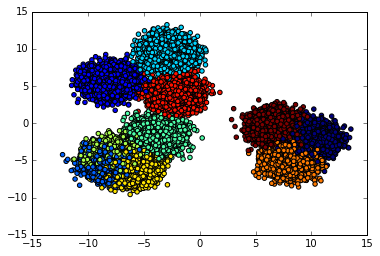

In [56]:
fit_samples_kmeans(sample, sample.shape[1], 10)